In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight:bold;width: 99% !important; }</style>"))


# 경고 메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore') 

In [4]:
import numpy as np
import pandas as pd
import folium 
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 기본 그래픽 스타일 설정 
sns.set(style='whitegrid')

#  한글글꼴로 변경
import matplotlib.font_manager as fm

path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['font.size'] = 12.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

# 음수 표시 에러 
mpl.rcParams['axes.unicode_minus'] = False

['Malgun Gothic']
12.0


### plotly 개요
- 플랏리, 플로틀리
- 애플리케이션 스타일. 인터랙션 그래프 지원
    - 인터랙션 그래프란 그래프가 생성된 이후 사용자가 여러가지 인터페이스를 통해 조절이 가능한 그래프 형태
- https://plotly.com/python/
- 설치 및 확인

  conda list

- 없으면 설치 <br>
  conda install -c plotly plotly
  
- 아래는 이미지 저장시 필요 패키지  <br>
pip install -U kaleido


In [6]:
# 모듈 임포트 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### plotly의 데이타
- https://plotly.com/python-api-reference/generated/plotly.data.html
- px.data.데이타셋함수명()
- 데이타셋
```
carshare(), 
election(), election_geojson(), experiment(indexed=False), 
gapminder(datetimes=False, centroids=False, year=None, pretty_names=False), 
iris(), wind()
medals_long(indexed=False), medals_wide(indexed=False)
stocks(indexed=False, datetimes=False)
tips(pretty_names=False)
```

### tips

In [16]:
df_tips = px.data.tips()
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [21]:
# gapminder 데이타셋
df_gapminder = px.data.gapminder(datetimes=True)
df_gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    1704 non-null   object        
 1   continent  1704 non-null   object        
 2   year       1704 non-null   datetime64[ns]
 3   lifeExp    1704 non-null   float64       
 4   pop        1704 non-null   int64         
 5   gdpPercap  1704 non-null   float64       
 6   iso_alpha  1704 non-null   object        
 7   iso_num    1704 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 106.6+ KB


In [23]:
df_gapminder.sample(5)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
892,Liberia,Africa,1972-01-01,42.614,1482628,803.005454,LBR,430
1042,Mozambique,Africa,2002-01-01,44.026,18473780,633.617947,MOZ,508
141,Bolivia,Americas,1997-01-01,62.050,7693188,3326.143191,BOL,68
1246,Portugal,Europe,2002-01-01,77.290,10433867,19970.907870,PRT,620
210,Burundi,Africa,1982-01-01,47.471,4580410,559.603231,BDI,108


### plotly 그래프
- 1) 단일 그래프 방식<br>
fig변수 = px.그래프함수명(데이타프레임, x=컬럼명, y=컬럼명, 옵션)
- 2) 다중 그래프 방식 : https://plotly.com/python/subplots/

In [26]:
df_tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [31]:
x_data = df_tips['smoker'].value_counts().index
y_data = df_tips['smoker'].value_counts().values
x_data, y_data

(Index(['No', 'Yes'], dtype='object'), array([151,  93], dtype=int64))

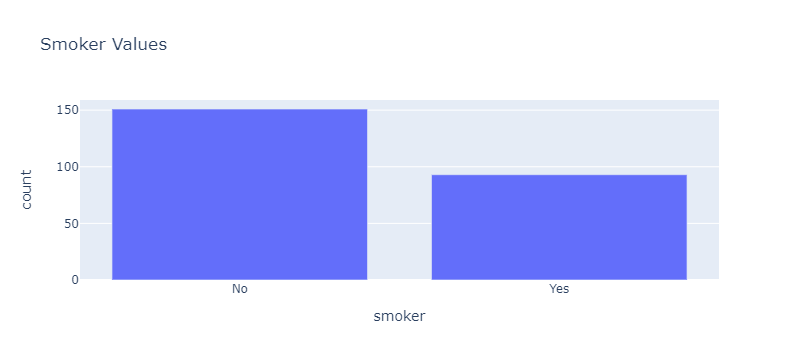

In [36]:
fig = px.bar(x = x_data, 
             y = y_data, 
             title = 'Smoker Values', 
             labels = {'x':'smoker','y':'count'})
fig

In [37]:
px.bar?

Signature:
px.bar(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    text_auto=False,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a bar plot, each row of `data_frame` is represe

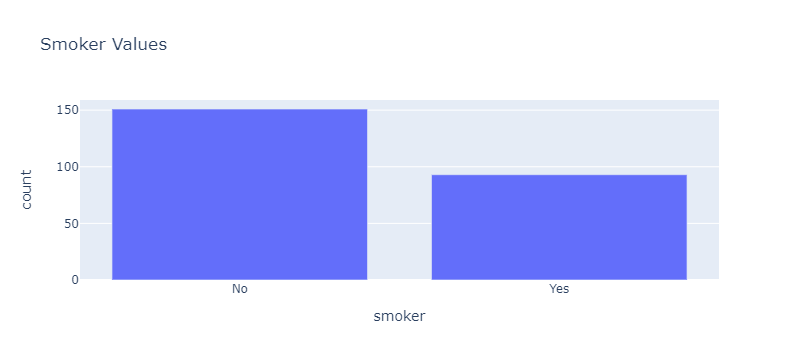

In [38]:
# 그래프 이미지 저장은?
fig = px.bar(x = x_data, 
             y = y_data, 
             title = 'Smoker Values', 
             labels = {'x':'smoker','y':'count'})
# 그래프 이미지 저장은?
fig.write_image('output/tips_smoker_bar.png')
fig

In [39]:
px.pie?

Signature:
px.pie(
    data_frame=None,
    names=None,
    values=None,
    color=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    labels=None,
    title=None,
    template=None,
    width=None,
    height=None,
    opacity=None,
    hole=None,
)
Docstring:
    In a pie plot, each row of `data_frame` is represented as a sector of a
    pie.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
    This argument needs to be passed for column names (and not keyword
    names) to be used. Array-like and dict are tranformed internally to a
    pandas DataFrame. Optional: if missing, a DataFrame gets constructed
    under the hood using the other arguments.
names: str or int or Series or array-like
    Either a name of a column in `data_frame`, or a pandas Series or
    array_like object. Values from this column or array_like are used as
    labels for sectors.
values: str or int or Ser

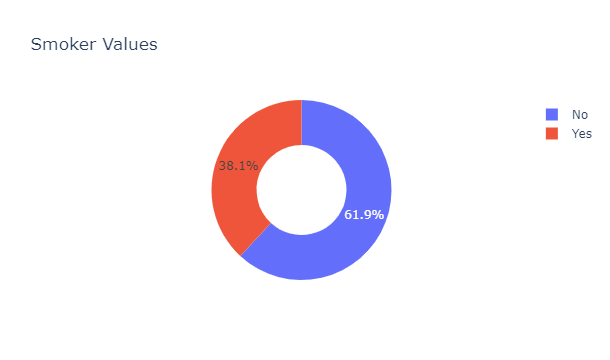

In [52]:
# 파이 그래프
fig = px.pie(values = y_data,
             names = x_data,
             title = 'Smoker Values', 
             hole = 0.5,
             # labels = {'x':'smoker','y':'count'},
            )
# fig.update_traces(textposition='inside', textinfo='percent')
fig.update_traces(textposition='inside', textinfo='percent')
fig

### 다중 그래프
- https://plotly.com/python/subplots/

```
fig변수 = make_subplots( rows=행수, cols=열수,
                         subplot_titles=(서브그래프제목1, ...),
                         print_grid=True )

fig.add_trace( go.그래프함수명(x=데이타, y=데이타, name=라벨명),
               row=행번호, col=열번호     )


fig.update_layout(height=세로크기, width=가로크기, title_text=전체제목)
```

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



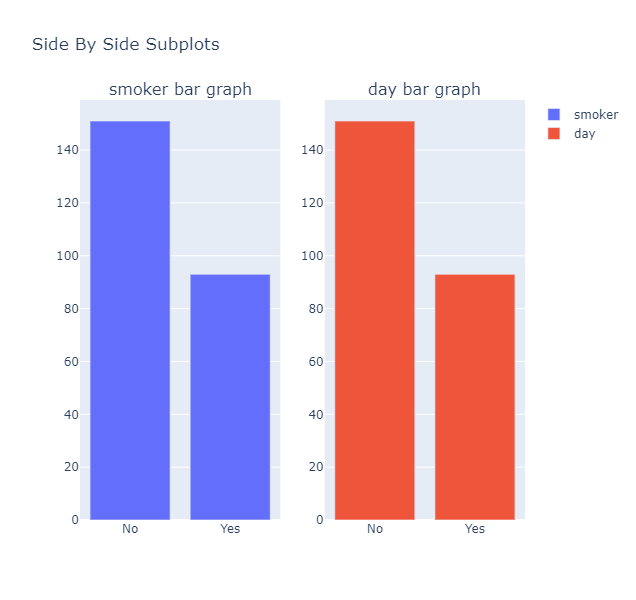

In [64]:
fig2 = make_subplots(rows=1, cols=2,
                     subplot_titles=('smoker bar graph', 'day bar graph'), # 각 그래프 제목 
                     print_grid=True )
# 첫뻔째 그래프
fig2.add_trace(
    go.Bar(x = x_data, y = y_data, 
           name='smoker'), 
    row=1, col=1)
# 두번째 그래프
fig2.add_trace(
    go.Bar(x = x_data, y = y_data,
            name='day'),
    row=1, col=2,)
# 전체 크기랑 전체 그래프 제목 설정
fig2.update_layout( height=600, width=1200,
                   title_text="Side By Side Subplots")